# Principal component analysis

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

## Finding important directions

We have seen in the lectures how Principal Component Analysis can be used to find the "most important directions" in data.
Starting from the data matrix $X$ the principal components are obtained by first computing the SVD of $X$, i.e.
$$X=U\Sigma V^T$$
Then we compute the first $k$ principal components by selecting the columns of $U$ (which are referred-to as *feature vectors*) and projeting the points in $X$ along the directions determined by the $k$ feature vectors. Let's try it out with a simple 2D dataset that roughly fits on a line:

In [2]:
[x,y] = np.array([[x,3 + 2*x + 0.6*np.random.randn()] for x in np.linspace(0,5,1001)]).T

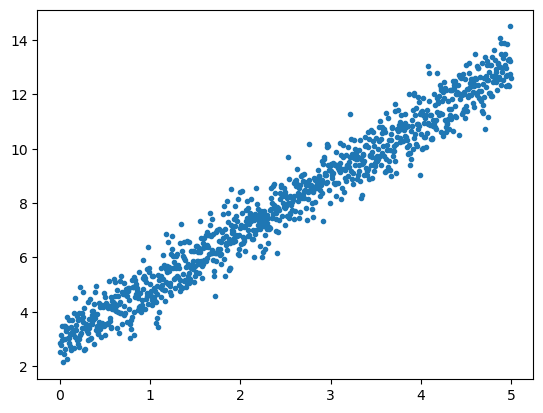

In [3]:
plt.plot(x,y,".")
plt.show()

In the video lectures we had the matrix of data with rows corresponding to the variables and columns corresponding to the samples (measurements of those variables). Here, we work with the standard convention in statistics and have rows for samples and columns for variables so we will need to keep in mind this different convention.

The first thing we need to do is subtract the mean in each column (i.e. standardize the data):

In [4]:
x = x-np.mean(x)
y = y-np.mean(y)
standardizedData = np.array([x,y]).T

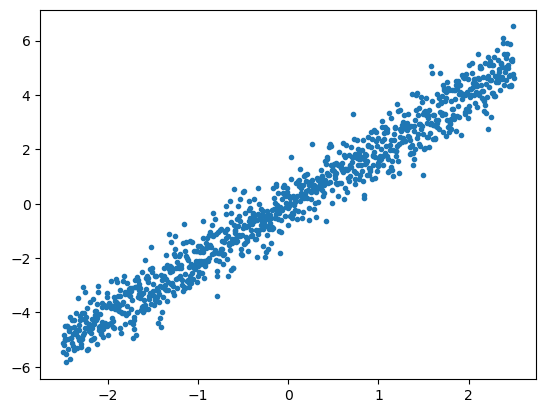

In [5]:
plt.plot(x,y,".")
plt.show()

Next we compute the singular value decomposition.

In [6]:
U,Svec,VT = npl.svd(standardizedData)
S = np.zeros(standardizedData.shape)
np.fill_diagonal(S,Svec)
Svec

array([104.46061996,   8.22638686])

As expected, we have two singular values, one which is much larger than the other. This reflects the fact that there is much more variance along the line than orthogonal to it.

The singular vectors in the columns of V give us the "most important" directions in the data.

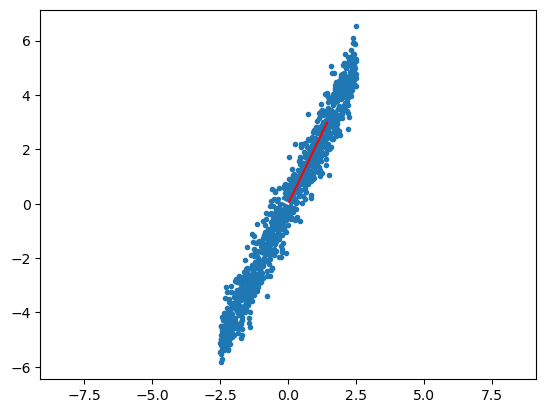

In [7]:
# Plot standardized data
plt.plot(x,y,".")

# First principal component
plt.plot([0,Svec[0]*VT[0,0]/np.sqrt(x.size -1)],
         [0, Svec[0]*VT[0,1]/np.sqrt(x.size -1)], "r-")

# Second principal component
plt.plot([0, Svec[1]*VT[1,0]/np.sqrt(x.size -1)],
         [0, Svec[1]*VT[1,1]/np.sqrt(x.size -1)],"w-")

plt.axis('equal')

plt.show()

The singular vectors in the columns of U give us the projection of the data long those "most important" directions (i.e. the same as standardizedData.V)

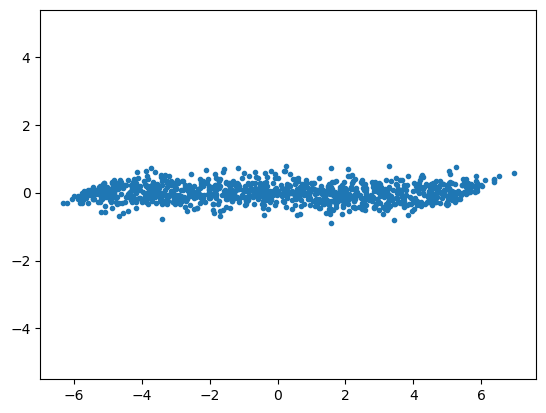

In [8]:
# Plot projected data
[x_proj, y_proj] = (U[:,:2]@S[:2,:2]).T
plt.plot(x_proj, y_proj, ".")

plt.axis('equal')
plt.show()

### In higher dimensions

Everything is the same with higher dimensional data. To see this, let's construct a 3-dimensional dataset with 3 variables:

In [9]:
[x,y,z] = np.array([[x,3 + 2*x + 0.6*np.random.randn(),7 + 4*x + 6*np.random.randn()]
                    for x in np.linspace(0,5,1001)]).T

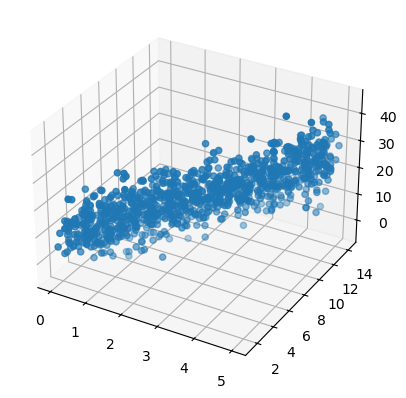

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
plt.show()

In this case we choose to standardise by subtracting the mean and dividing by the standard deviation:

In [11]:
x = (x-np.mean(x))/np.std(x)
y = (y-np.mean(y))/np.std(y)
z = (z-np.mean(z))/np.std(z)
standardizedData = np.array([x,y,z]).T

Next we compute the singular value decomposition.

In [12]:
U,Svec,VT = npl.svd(standardizedData)
S = np.zeros(standardizedData.shape)
np.fill_diagonal(S,Svec)
Svec

array([50.74388691, 20.15055671,  4.69180197])

This time we have three singular values, as expected. The singular vectors in the columns of V give us the "most important" directions in the data:

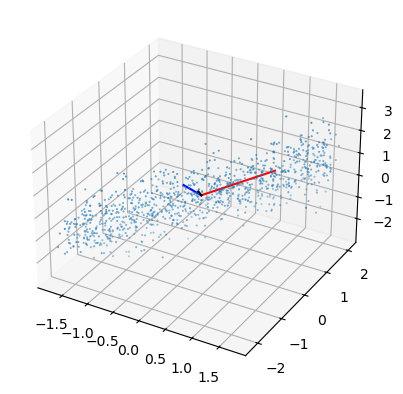

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, s=0.2)
# First principal component
ax.plot([0,Svec[0]*VT[0,0]/np.sqrt(x.size -1)],
         [0, Svec[0]*VT[0,1]/np.sqrt(x.size -1)],
         [0, Svec[0]*VT[0,2]/np.sqrt(x.size -1)],"r-")

# Second principal component
ax.plot([0,-Svec[1]*VT[1,0]/np.sqrt(x.size -1)],
         [0, -Svec[1]*VT[1,1]/np.sqrt(x.size -1)],
         [0, -Svec[1]*VT[1,2]/np.sqrt(x.size -1)],"b-")


# Third principal component
ax.plot([0,-Svec[2]*VT[2,0]/np.sqrt(x.size -1)],
         [0, -Svec[2]*VT[2,1]/np.sqrt(x.size -1)],
         [0, -Svec[2]*VT[2,2]/np.sqrt(x.size -1)],"k-")

plt.show()

The singular vectors in the columns of U give us the projection of the data long those "most important" directions (i.e. the same as standardizedData.V)

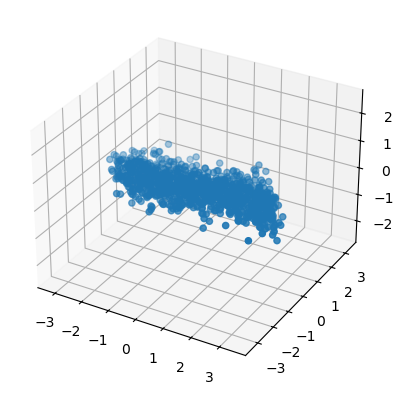

In [14]:
# Plot projected data
[x_proj, y_proj, z_proj] = (U[:,:3]@S[:3,:3]).T
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_proj, y_proj, z_proj)

plt.axis('equal')
plt.show()

## PCA and classification

Let's now use PCA for _classification_. In particular, we will identify the type of a flower based on measurements of their properties. We will work with a dataset of iris flowers:

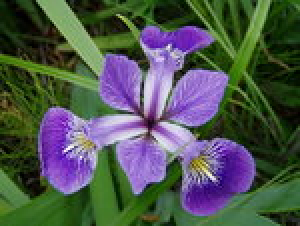

These come in three different categories: setosa, versicolor and virginica. The iris dataset contains 4 variables for the length and width of the sepals and petals (in centimeters). Let's load the data:

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

In [54]:
[iris.feature_names,iris.target_names]

[['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10')]

In [55]:
iris.data.shape

(150, 4)

Let's first try to plot the data. This is a 4-dimensional dataset (one dimension for each variable) so we don't have an easy way to visualise it all. Instead, let's use PCA to visualise the three most important dimensions. We do this as before: standardize the data, use the SVD to find the principal components and the projection of the data onto those components (we could also un-standardize the result for plotting, but let's not bother with that step here).

In [56]:
standardizedData = (iris.data-np.mean(iris.data, axis=0))/np.std(iris.data, axis=0)

In [57]:
U,Svec,VT = npl.svd(standardizedData)
S = np.zeros(standardizedData.shape)
np.fill_diagonal(S,Svec)
Svec

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

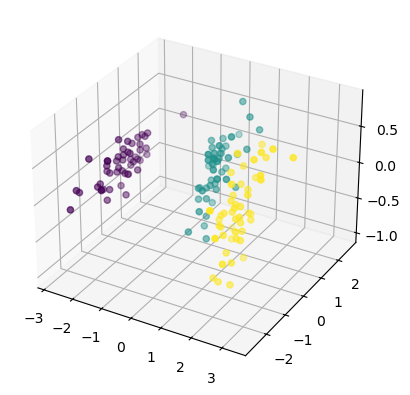

In [58]:
# Plot projected data
[x_proj, y_proj, z_proj] = (U[:,:3]@S[:3,:3]).T
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_proj, y_proj, z_proj, c=iris.target)
plt.show()

It looks like there is hope for separating out the species based on their properties: we could clearly draw a plane that separates purple from the others. This could be achieved using, e.g. Support Vector Machines. In fact, we could even do this projecting down to 2D:

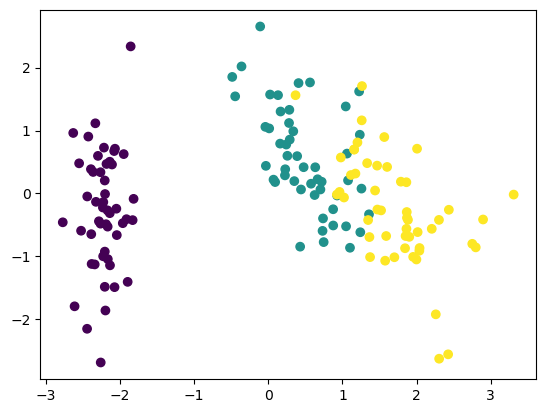

In [59]:
# Plot projected data
[x_proj_2D, y_proj_2D] = (U[:,:2]@S[:2,:2]).T
plt.scatter(x_proj_2D, y_proj_2D, c=iris.target)
plt.show()

We can go even further than this. We have seen how we can use PCA to project high-dimensional data onto a lower dimensional surface, but we could also reconstruct those projected vectors in the original 4-dimensional space. For example, let's take one sample:

In [60]:
iris1 = standardizedData[0]
iris1

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

We can project this onto the lower-dimensional space:

In [61]:
U[0,:2]@S[:2,:2]

array([-2.26470281, -0.4800266 ])

Then we can take these principal components and combine them with the principal component vectors to reconstruct a 4-vector in the original space. This will be the closest point on our lower-dimensional surface to the original 4-dimensional sample:

In [62]:
U[0,:2]@S[:2,:2]@VT[:2,:]

array([-0.99888895,  1.05319838, -1.30270654, -1.24709825])

Now let's do this for all sample points and plot the result (for visualisation purposes, we only consider the 3D subspace spanned by the second, third and fourth features):

In [86]:
VT.shape

(4, 4)

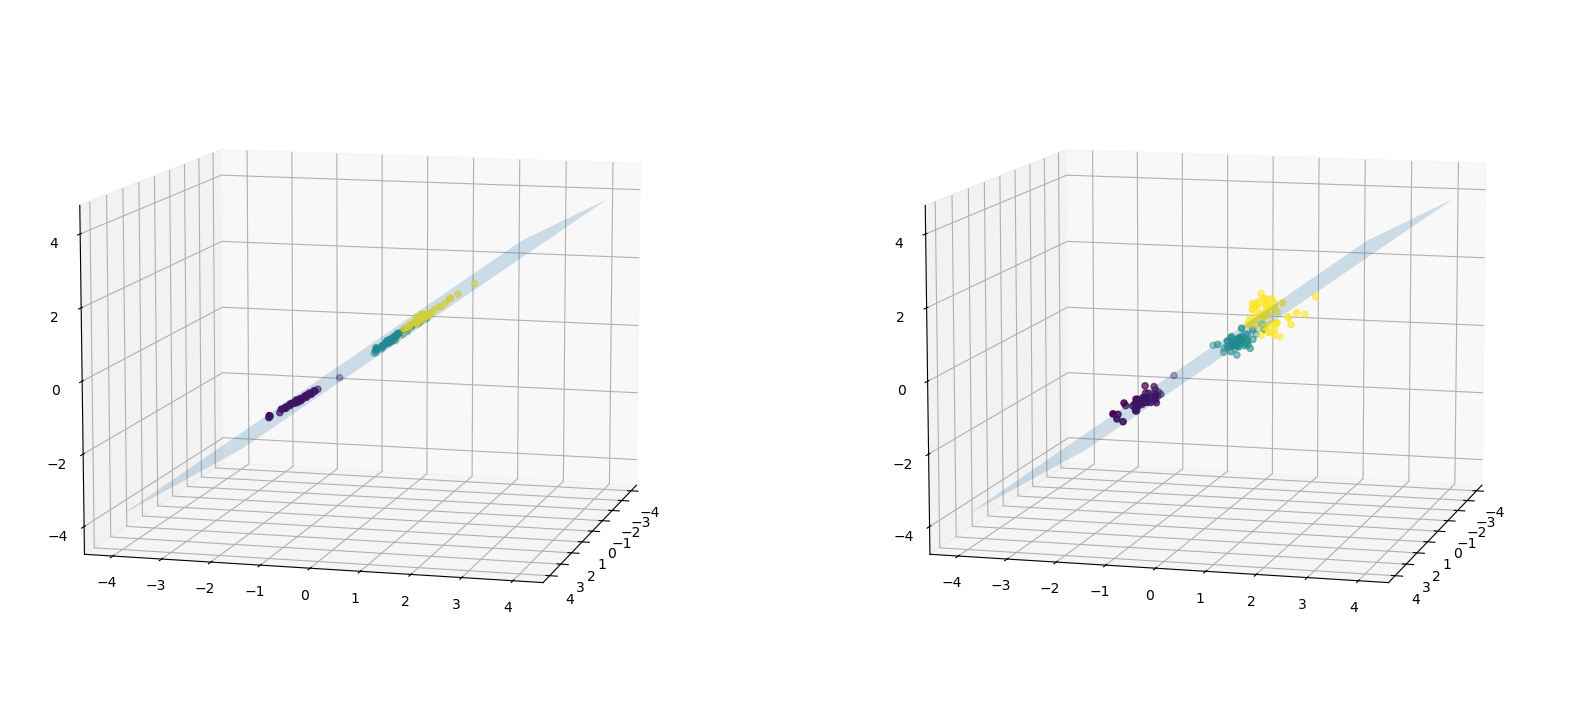

In [120]:
# Projected data onto 2D and 3D principal directions
[x_proj_3D, y_proj_3D, z_proj_3D] = (U[:,:2]@S[:2,:2]@VT[:2,1:]).T
[x_3D, y_3D, z_3D] = (U[:,:]@S[:,:]@VT[:,1:]).T

# Find the equation for the the plane on which the 2D projected data sits
(x1, x2, x3) = np.array([x_proj_3D, y_proj_3D, z_proj_3D])[:,:3].T
(a,b,c) = np.cross(x1-x3, x2-x3)
d = -x1@normal

# Generate a plot of the plane through the 2D projected data
xx, yy = np.meshgrid(range(-4,5), range(-4,5))

# calculate corresponding z
zz = (-a * xx - b * yy - d) /c

# Plot the data and the surface
fig = plt.figure(figsize=(20, 20))

ax = plt.subplot(1,2,1,projection='3d')
ax.view_init(elev=10., azim=15)
ax.scatter(x_proj_3D, y_proj_3D, z_proj_3D, c=iris.target)
ax.plot_surface(xx, yy, zz, alpha=0.2)

ax2 = plt.subplot(1,2,2,projection='3d')
ax2.view_init(elev=10., azim=15)
ax2.scatter(x_3D, y_3D, z_3D, c=iris.target)
ax2.plot_surface(xx, yy, zz, alpha=0.2)
plt.show()

Finally, we could also use this approach to fill in missing data. For example, say we had missed a measurement for our first setosa sample. We can still project this onto the lower dimensional space and we can reconstruct a 4-dimensional vector from this, "filling in" the missing  piece. We won't cover this idea further in this module, but this is a lot of information about this _data imputation_ available online.

## Handwriting recognition

Next we will see an example of use of the PCA with the MNIST dataset for handwritten digit recognition. First we load 10,000 samples for training:

In [26]:
from sklearn.datasets import fetch_openml

def plot_digit(digit):  
    # A function to plot a vector of length 784 as a 28 x 28 image
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image, cmap = plt.get_cmap('gray'))

In [27]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X_01 = X[np.any([y == 0, y == 1], axis = 0)] / 255.0
y_01 = y[np.any([y == 0, y == 1], axis = 0)]
X = X[:10000]
y = y[:10000]
(X.shape, y.shape)

((10000, 784), (10000,))

**Question**: How similar/dissimilar are the digits within each group?

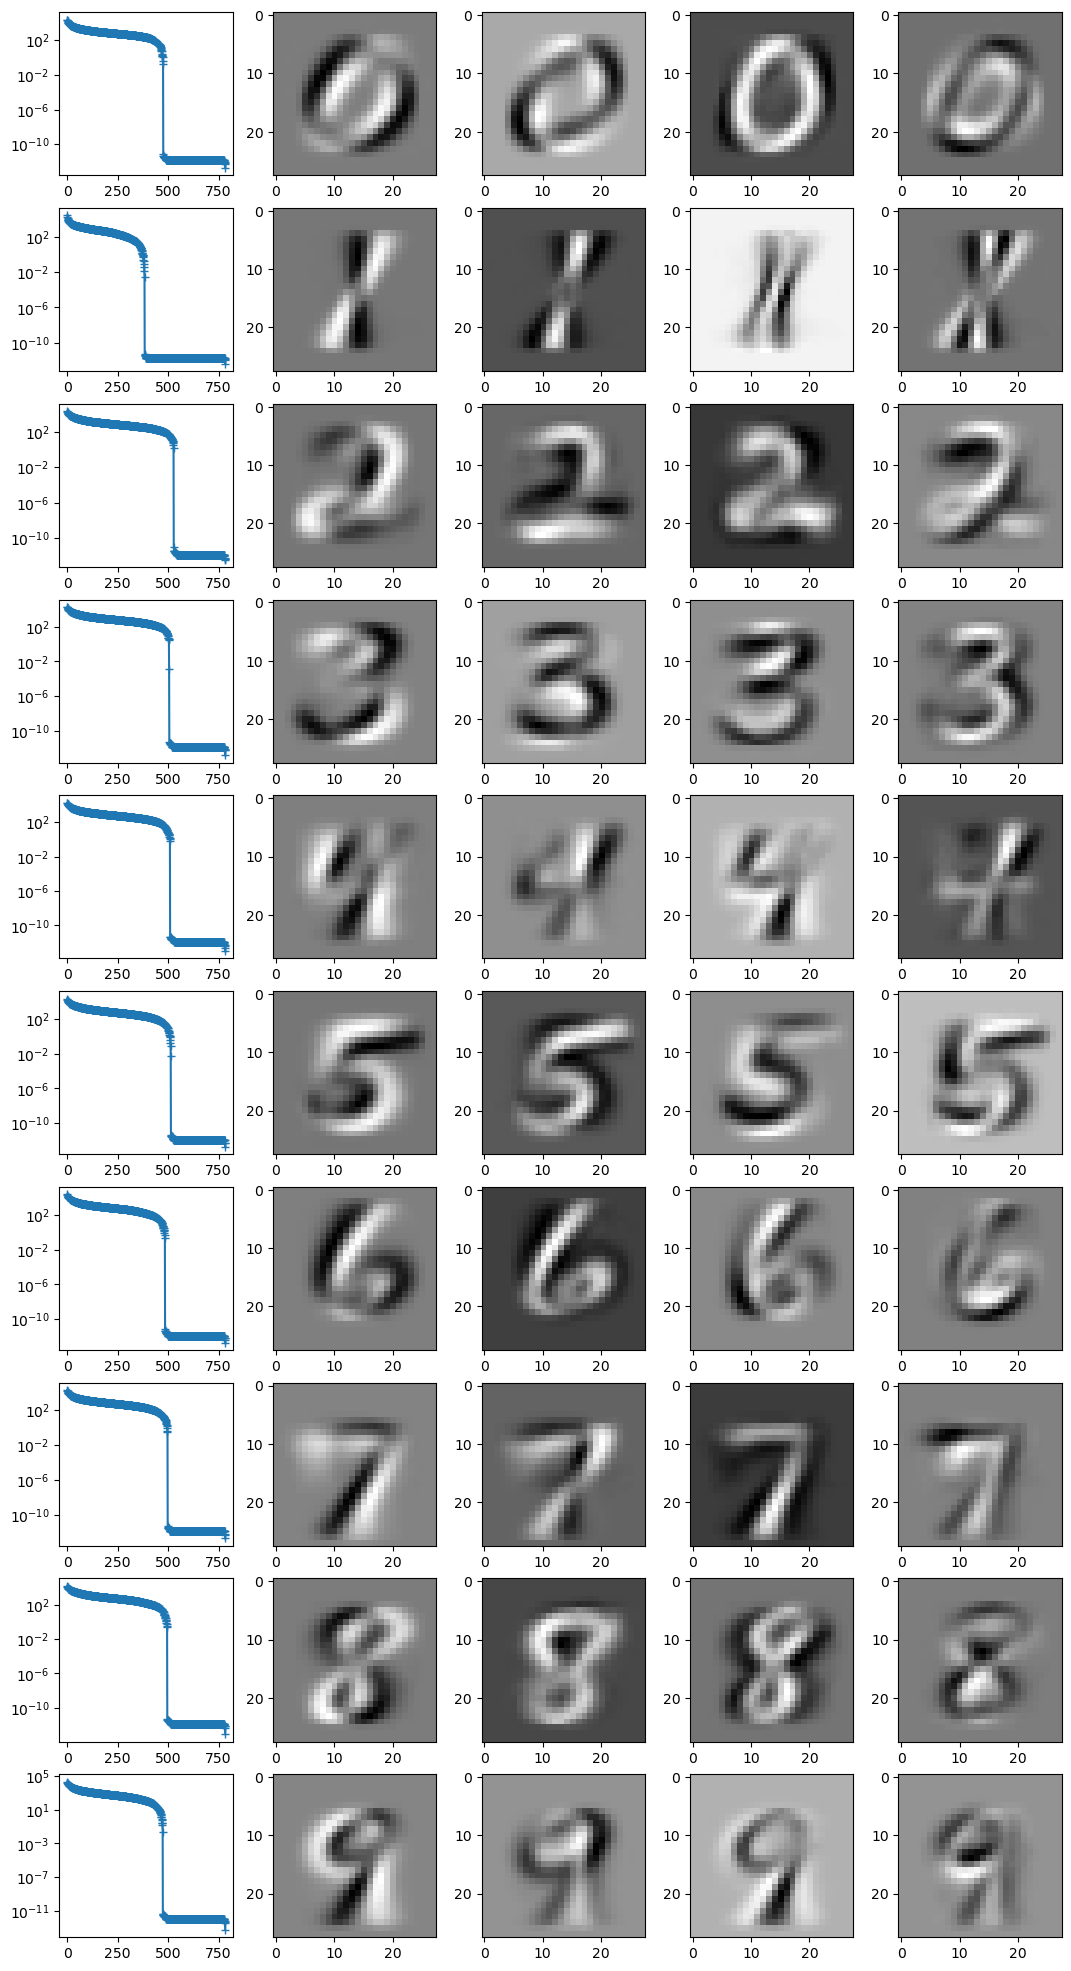

In [28]:
plt.figure(figsize=(13,25))
for i in range(10):  
    Xk = X[y==i,:]
    Xk = Xk.reshape(Xk.shape[0],28*28)
    mean = np.mean(Xk, axis=0)
    Xk = np.transpose(Xk-mean)
    U,Sval,VT = npl.svd(Xk)
    plt.subplot(10,5,1 + 5*i)
    plt.semilogy(Sval,linestyle=None,marker='+')
    plt.subplot(10,5,2 + 5*i)
    plot_digit(U[:,0])
    plt.subplot(10,5,3 + 5*i)
    plot_digit(U[:,1])
    plt.subplot(10,5,4 + 5*i)
    plot_digit(U[:,2])
    plt.subplot(10,5,5 + 5*i)
    plot_digit(U[:,3])

plt.show()

If we think of each 28 x 28 image as a 784 dimensional vector, then we can consider this as a set of 10,000 samples in a 784 dimensional vector space. A random vector in that space won't look like much, but the 10,000 samples are special as they represent important "directions" in this space.

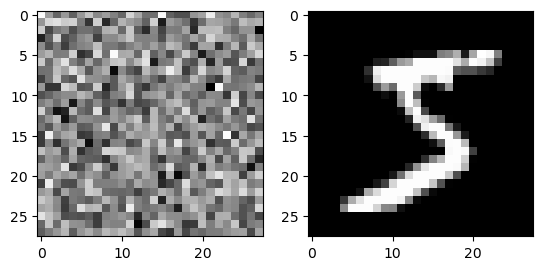

In [29]:
plt.subplot(1,2,1)
plot_digit(np.random.randn(28,28))
plt.subplot(1,2,2)
plot_digit(X[0])
plt.show()

Let's see if PCA will allow us to identify the important "directions" corresponding to zeros and ones, and even to differentiate between them. Let's focus on the classes '0' and '1'. Now that we have a matrix, we can use PCA to reduce the 784 dimensional vectors to just the three most important ones.

In [30]:
mean = np.mean(X_01, axis=0)
Xstd = np.transpose(X_01-mean)
U,Sval,VT = npl.svd(Xstd)

In [31]:
Z_01 = U[:,:3].T@Xstd
print(Z.shape)

NameError: name 'Z' is not defined

We can visualise the first 3 feature vectors

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(1,3,1)
plot_digit(U[:,0])
plt.subplot(1,3,2)
plot_digit(U[:,1])
plt.subplot(1,3,3)
plot_digit(U[:,2])
plt.show()

If we now visualise all of those samples on our two-dimensional space, we can quite clearly distinguish between zeros and ones:

In [ ]:
from mpl_toolkits import mplot3d

labels_str = ["0", "1"]
fig = plt.figure(figsize=(10, 5))
fig.add_subplot(1,2,1)
plt.scatter(Z_01[0,:], Z_01[1,:], c=y_01)
plt.legend(labels=labels_str, loc="lower left")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

ax = fig.add_subplot(1,2,2,projection='3d')
ax.scatter3D(Z_01[0,:], Z_01[1,:],Z_01[2,:], c=y_01,s=5)
plt.legend(labels=labels_str, loc="lower left")
plt.show()